In [123]:
import pandas as pd
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt

In [124]:
pip install tensorflow_datasets


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [125]:
import tensorflow_datasets as tfds

In [126]:
(train, test) = tfds.load('mnist', split = ['train', 'test'])

In [127]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [128]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [130]:
def load_dataset(train_size, test_size):
    train, test = ts.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)
    
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [131]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2763272966574752
Max: 244.9469330286174


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Optimizing at the Initialization Stage

In [132]:
from tensorflow.keras import layers

In [133]:
init = ts.initializers.zeros()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)

In [134]:
def simple_model(initializer, activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

In [135]:
init = ts.initializers.zeros()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)

In [136]:
model_zeros = simple_model(init, activate)

In [137]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 0s 10ms/step - loss: 2.3026 - accuracy: 0.1113 - val_loss: 2.3025 - val_accuracy: 0.1138
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3025 - accuracy: 0.1125 - val_loss: 2.3025 - val_accuracy: 0.1138
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3025 - val_accuracy: 0.1138
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3024 - val_accuracy: 0.1138
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3024 - val_accuracy: 0.1138
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3024 - val_accuracy: 0.1138
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3023 - val_accuracy: 0.1138
Epoch 8/10
19/19 [=

In [138]:
init = ts.initializers.random_normal()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 10ms/step - loss: 2.3021 - accuracy: 0.1119 - val_loss: 2.3019 - val_accuracy: 0.1385
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3017 - accuracy: 0.1596 - val_loss: 2.3015 - val_accuracy: 0.1625
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3013 - accuracy: 0.1704 - val_loss: 2.3012 - val_accuracy: 0.1774
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3010 - accuracy: 0.1697 - val_loss: 2.3009 - val_accuracy: 0.1736
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3007 - accuracy: 0.1671 - val_loss: 2.3006 - val_accuracy: 0.1661
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3004 - accuracy: 0.1585 - val_loss: 2.3003 - val_accuracy: 0.1602
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3001 - accuracy: 0.1556 - val_loss: 2.3001 - val_accuracy: 0.1530
Epoch 8/10
19/19 [=

In [139]:
init = ts.initializers.glorot_uniform()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 10ms/step - loss: 2.3185 - accuracy: 0.1108 - val_loss: 2.3011 - val_accuracy: 0.1311
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.2812 - accuracy: 0.1625 - val_loss: 2.2659 - val_accuracy: 0.2014
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.2448 - accuracy: 0.2180 - val_loss: 2.2281 - val_accuracy: 0.2345
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.2036 - accuracy: 0.2439 - val_loss: 2.1842 - val_accuracy: 0.2552
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 2.1561 - accuracy: 0.2641 - val_loss: 2.1348 - val_accuracy: 0.2764
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.1050 - accuracy: 0.2862 - val_loss: 2.0850 - val_accuracy: 0.2966
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 2.0554 - accuracy: 0.3054 - val_loss: 2.0376 - val_accuracy: 0.3148
Epoch 8/10
19/19 [=

In [141]:
init = ts.initializers.he_uniform()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 12ms/step - loss: 2.4767 - accuracy: 0.1447 - val_loss: 2.2628 - val_accuracy: 0.1925
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.1293 - accuracy: 0.2713 - val_loss: 2.0189 - val_accuracy: 0.3259
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 1.9250 - accuracy: 0.3701 - val_loss: 1.8381 - val_accuracy: 0.4108
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 1.7619 - accuracy: 0.4424 - val_loss: 1.6801 - val_accuracy: 0.4736
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 1.6137 - accuracy: 0.4945 - val_loss: 1.5326 - val_accuracy: 0.5211
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 1.4737 - accuracy: 0.5365 - val_loss: 1.3955 - val_accuracy: 0.5595
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 1.3434 - accuracy: 0.5724 - val_loss: 1.2714 - val_accuracy: 0.5942
Epoch 8/10
19/19 [=

Text(0, 0.5, 'Validation Accuracy')

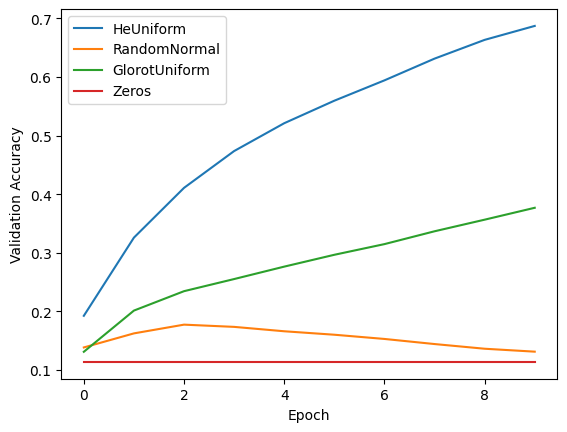

In [142]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [145]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

In [146]:
simple_model_bn().summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_122 (Dense)           (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_123 (Dense)           (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)              

In [148]:
init = ts.keras.initializers.random_normal()
activate = 'relu'

optimizer = ts.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 18ms/step - loss: 1.9421 - accuracy: 0.3738 - val_loss: 2.2963 - val_accuracy: 0.1634
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 1.3085 - accuracy: 0.5935 - val_loss: 2.2863 - val_accuracy: 0.1785
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0480 - accuracy: 0.6888 - val_loss: 2.2718 - val_accuracy: 0.1886
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 0.8935 - accuracy: 0.7403 - val_loss: 2.2521 - val_accuracy: 0.2040
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 0.7859 - accuracy: 0.7762 - val_loss: 2.2257 - val_accuracy: 0.2255
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.7062 - accuracy: 0.8033 - val_loss: 2.1908 - val_accuracy: 0.2428
Epoch 7/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6445 - accuracy: 0.8217 - val_loss: 2.1463 - val_accuracy: 0.2583
Epoch 8/10
19/19

In [149]:
init = ts.keras.initializers.he_normal()
activate = 'relu'

optimizer = ts.keras.optimizers.SGD(0.01)
model_heu = simple_model_bn(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 17ms/step - loss: 2.4912 - accuracy: 0.1908 - val_loss: 2.3336 - val_accuracy: 0.1466
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 1.9928 - accuracy: 0.3453 - val_loss: 2.1213 - val_accuracy: 0.2526
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 1.7108 - accuracy: 0.4501 - val_loss: 1.9179 - val_accuracy: 0.3901
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 1.5172 - accuracy: 0.5291 - val_loss: 1.7261 - val_accuracy: 0.5090
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 1.3708 - accuracy: 0.5881 - val_loss: 1.5516 - val_accuracy: 0.5859
Epoch 6/10
19/19 [==============================] - 0s 13ms/step - loss: 1.2523 - accuracy: 0.6378 - val_loss: 1.3987 - val_accuracy: 0.6338
Epoch 7/10
19/19 [==============================] - 0s 13ms/step - loss: 1.1542 - accuracy: 0.6758 - val_loss: 1.2671 - val_accuracy: 0.6778
Epoch 8/10
19

In [152]:
init = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adagrad(0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 19ms/step - loss: 1.1389 - accuracy: 0.6527 - val_loss: 2.2973 - val_accuracy: 0.2888
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5066 - accuracy: 0.8647 - val_loss: 2.2924 - val_accuracy: 0.1322
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.3769 - accuracy: 0.9000 - val_loss: 2.2856 - val_accuracy: 0.0992
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 0.3130 - accuracy: 0.9170 - val_loss: 2.2762 - val_accuracy: 0.1011
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.2728 - accuracy: 0.9272 - val_loss: 2.2634 - val_accuracy: 0.1121
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.2444 - accuracy: 0.9353 - val_loss: 2.2463 - val_accuracy: 0.1443
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.2234 - accuracy: 0.9411 - val_loss: 2.2237 - val_accuracy: 0.2076
Epoch 8/10
19/

In [151]:
init = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 17ms/step - loss: 0.8466 - accuracy: 0.7335 - val_loss: 2.0676 - val_accuracy: 0.3356
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.2654 - accuracy: 0.9213 - val_loss: 1.7928 - val_accuracy: 0.5499
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 0.1790 - accuracy: 0.9477 - val_loss: 1.5650 - val_accuracy: 0.7348
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.1367 - accuracy: 0.9599 - val_loss: 1.3945 - val_accuracy: 0.7855
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 0.1116 - accuracy: 0.9677 - val_loss: 1.2299 - val_accuracy: 0.8182
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0891 - accuracy: 0.9737 - val_loss: 1.0639 - val_accuracy: 0.8621
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.8593 - val_accuracy: 0.8849
Epoch 8/10
19/1

In [153]:
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
init = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3608 - accuracy: 0.8918 - val_loss: 0.2316 - val_accuracy: 0.9316
Epoch 2/2000
1875/1875 [==============================] - 2s 976us/step - loss: 0.2131 - accuracy: 0.9361 - val_loss: 0.1793 - val_accuracy: 0.9494
Epoch 3/2000
1875/1875 [==============================] - 2s 983us/step - loss: 0.1724 - accuracy: 0.9477 - val_loss: 0.1772 - val_accuracy: 0.9519
Epoch 4/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1468 - accuracy: 0.9550 - val_loss: 0.1457 - val_accuracy: 0.9615
Epoch 5/2000
1875/1875 [==============================] - 2s 963us/step - loss: 0.1267 - accuracy: 0.9618 - val_loss: 0.1655 - val_accuracy: 0.9554
Epoch 6/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1153 - accuracy: 0.9646 - val_loss: 0.1537 - val_accuracy: 0.9584
Epoch 7/2000
1875/1875 [==============================] - 2s 979us/step - loss: 0.1053 - accuracy: 0.9676 - val_loss: 

In [ ]:
init = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)